In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as  plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [90]:
df=pd.read_csv('../input/titanic/train.csv')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

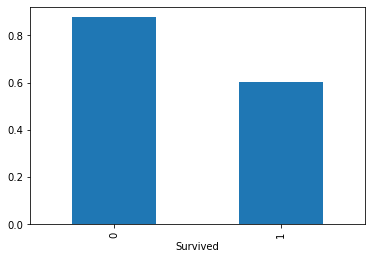

In [95]:
df.groupby('Survived')['cabin_null'].mean().plot(kind='bar')
#among notsurvived 87%cabins have null values
#60% null values for cabins who have survuved

In [96]:
(df.groupby('Survived')).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.876138
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.602339


#Handling of Missing Values
1. mean/median/mode imputation
2. Random sample imputation
3. capturing nan values with new features
4. End of Distribution imputation
5.arbitary imputation
6.Frequent category imputation

In [2]:
#MEAN MEDIAN MODE
df=pd.read_csv('../input/titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [98]:
median=df['Age'].median()
df['Age_median']=df['Age'].fillna(median)

In [99]:
print(df['Age'].std())
print(df['Age_median'].std())


14.526497332334044
13.019696550973194


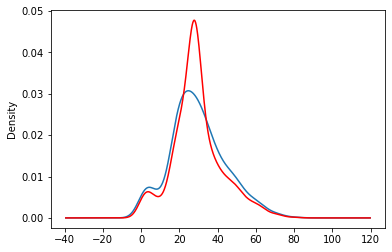

In [100]:
df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde',color='red')


#advantages and disdav of mena/mode imputation
Easy to implement
roboust to outliers

#disadvantage
change in distrubution like change in variance
impact corelations

In [101]:
'''
#Random Smaple Imputation
Taking random  obs form dataset to replace null values
when to be used,
when data are missing  completely at  random(Mcar) like mean and mode imputation
'''

df_random=df.copy()
df_random.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [102]:
df.Age.isnull().sum()

177

In [103]:
df.Age.dropna().sample(177)

789    46.0
103    33.0
262    52.0
329    16.0
834    18.0
       ... 
213    30.0
812    35.0
685    25.0
658    23.0
576    34.0
Name: Age, Length: 177, dtype: float64

In [104]:
def impute_random(df,col):
    median=df[col].median()
    df[col+'median']=df[col].fillna(median)
    df[col+'random']=df[col]
    rand_sample=df[col].dropna().sample(df[col].isnull().sum(),random_state=11)
    rand_sample.index=df[df[col].isnull()].index
    df.loc[df[col].isnull(),col+'random']=rand_sample
impute_random(df,'Age')    

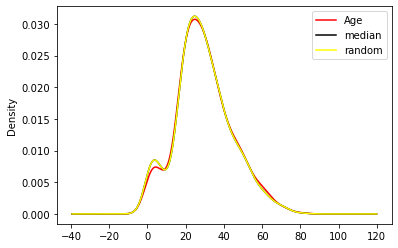

In [105]:
import matplotlib.pyplot as plt
%matplotlib  inline

df['Age'].plot(kind='kde',label='Age',color='red')
df['Agerandom'].plot(kind='kde',label='median',color='black')
df['Agerandom'].plot(kind='kde',label='random',color='yellow')
plt.legend()

#ADV
easy to implement
no distortion in varianecc

#Disadv
randomness wont work in every situation

In [106]:
#capturing nan values with new features
df_new=df.copy()
df_new['Age'].isnull().sum()

df_new['Age_new']=np.where(df_new['Age'].isnull(),1,0)
'''
Adv
importance on missing values

dis
if there are more col with  missing values, creating new col will lead to curese of dimensionality

'''


'\nAdv\nimportance on missing values\n'

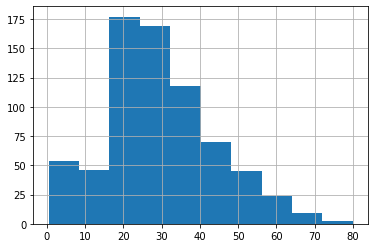

In [107]:
#end of distribution imputation
df['Age'].hist()

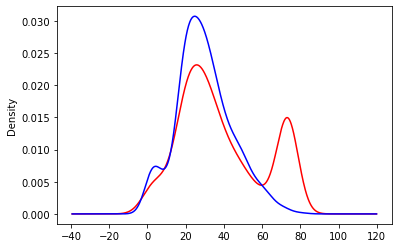

In [117]:

extreme=df['Age'].mean()+3*df['Age'].std()#data after 3 std
df['Age_std']=df['Age'].fillna(extreme)

df['Age_std'].plot(kind='kde',color='red')
df['Age'].plot(kind='kde',color='blue')


import seaborn as sns


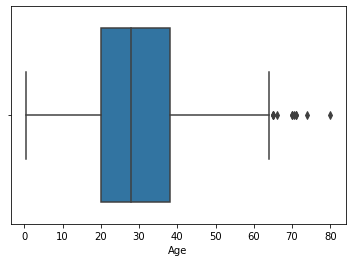

In [120]:
sns.boxplot(df['Age'])


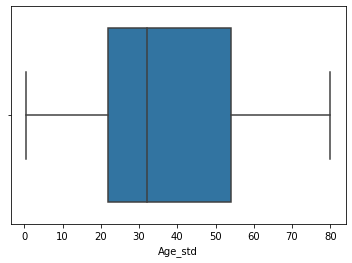

In [121]:
sns.boxplot(df['Age_std'])
#NO Outliers

In [3]:
#Arbitrary value imputation
#replacing nan with arbitrary  value
#rule for arbitrary: vvalue should not be present more frequent
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


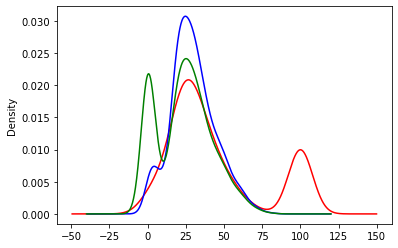

In [6]:
def impute_arb(df,variable):
    df[variable+'hundread']=df[variable].fillna(100)
    df[variable+'zero']=df[variable].fillna(0)
impute_arb(df,'Age')    
df['Agehundread'].plot(kind='kde',color='red')
df['Age'].plot(kind='kde',color='blue')
df['Agezero'].plot(kind='kde',color='green')
plt.legend()
